<a href="https://colab.research.google.com/github/JeongeunL/Boostcourse/blob/main/3_Pima_diabetes_data_with_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 구성

Pregnancies : 임신 횟수 <br>
Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 <br>
BloodPressure : 이완기 혈압 (mm Hg) <br>
SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값 <br>
Insulin : 2시간 혈청 인슐린 (mu U / ml) <br>
BMI : 체질량 지수 (체중kg / 키(m)^2) <br>
DiabetesPedigreeFunction : 당뇨병 혈통 기능 <br>
Age : 나이 <br>
Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


##EDA

###1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH = "/content/drive/MyDrive/Colab Notebooks/부스트코스/data/"
df = pd.read_csv(PATH + "diabetes.csv")

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# 수치데이터에 대한 요약: 평균, 중위값, 최대/최소값 등...
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# Pregnancies는 최소값이 0이 될 수 있음
# Glucose의 25% 값이 99인데 최소값이 0 --> 결측치로 보임
# BloodePressure이 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임
# SkinThickness가 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임
# BMI도 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임

In [13]:
# (숫자형 데이터에 대한 요약)
#df.describe(include="number")

### 2. 결측치 시각화

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
feature_columns = df.columns[:-1].to_list()

In [27]:
cols = feature_columns[1:] # Pregnancies는 결측치가 없는 것으로 보이므로 제외
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [32]:
# 결측치 여부를 나타내는 데이터프레임을 만듦
# 0을 결측치라 가정하고, 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null이라는 데이터프레임에 담음

df_null = df[cols].replace(0, np.nan) # 0인 값을 결측치로 변경
df_null = df_null.isnull()
df_null.sum() # 결측치 개수

# => 이전 분석에서 Insulin이 중요한 피쳐로 나타나지 않았는데,
# 상식적으로는 당뇨병에 인슐린 수치가 많은 영향을 미칠 것으로 생각됨에도
# Insulin의 결측치가 많아서 중요한 피쳐로 나타나지 않은 것으로 보임

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

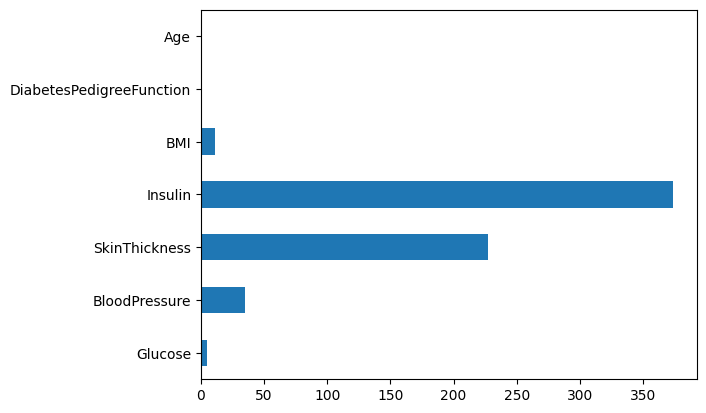

In [33]:
df_null.sum().plot.barh()

In [34]:
# 결측치의 비율 (한 컬럼당 결측치의 비율)
df_null.mean() * 100

# -> Insulin의 48%가 결측치

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

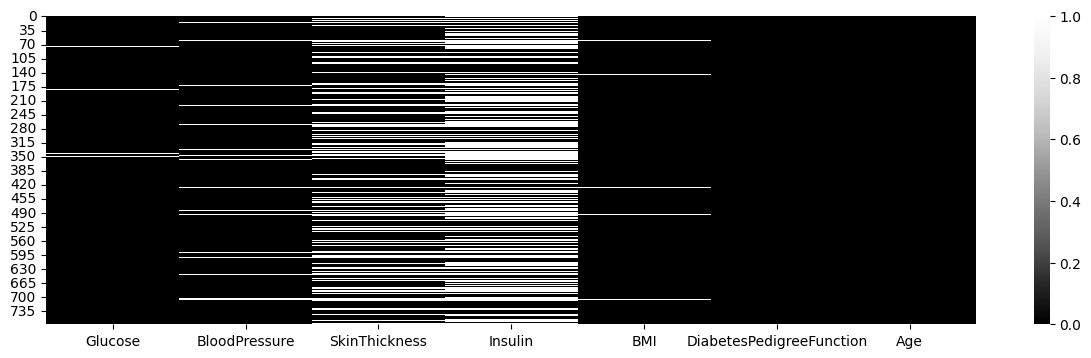

In [35]:
# 결측치를 heatmap으로 시각화
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

# 결측치는 흰색

### 3. 정답값 살펴보기

In [38]:
# 정답값인 Outcome의 개수 확인
df["Outcome"].value_counts()

# 당뇨병이 발병하면 1, 그렇지 않으면 0

0    500
1    268
Name: Outcome, dtype: int64

In [39]:
# 정답값인 Outcome의 비율 확인
df["Outcome"].value_counts(normalize=True)

# -> 발병하는 비율이 34%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [44]:
# 다른 변수와 함께 보기 (ex) 임신 횟수에 따른 당뇨 발병 비율 및 빈도)
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
# (인덱스에 올 column, value에 올 column)
df_po

# -> 임신 횟수가 많아질수록 당뇨 발병 비율이 높아짐
# 이 데이터에서, 임신 횟수가 14명 이상이면 당뇨가 100% 발병되는 것으로 나타남
# 하지만 14번 이상 임신한 경우가 많지 않음 (데이터 수가 적음)

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

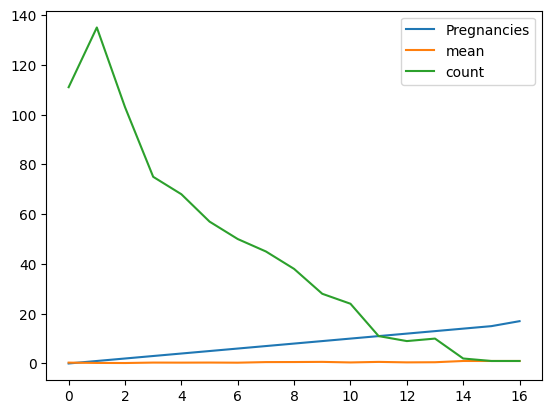

In [46]:
# 위의 결과 시각화
# 하지만, 단위가 다르기 때문에 다 같이 표현하는 것 적합하지 않아 보임
df_po.plot()

<Axes: >

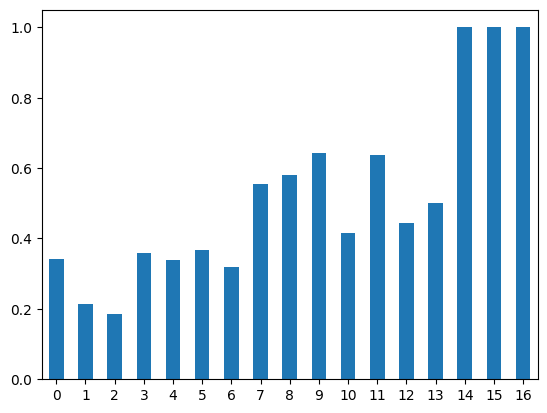

In [50]:
# 임신횟수에 따른 당뇨병 발병 비율 시각화
df_po["mean"].plot.bar(rot=0)
# rot: 글씨 rotation

### 4. Counterplot

<ipython-input-64-8b87634f7295>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outcome", palette=palette)


<Axes: xlabel='Outcome', ylabel='count'>

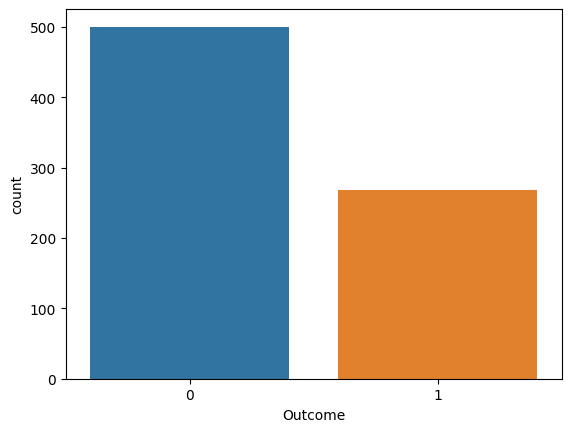

In [64]:
# 당뇨병 발병 빈도수 비교
palette = sns.color_palette('tab10', 2)
sns.countplot(data=df, x="Outcome", palette=palette)

<Axes: xlabel='Pregnancies', ylabel='count'>

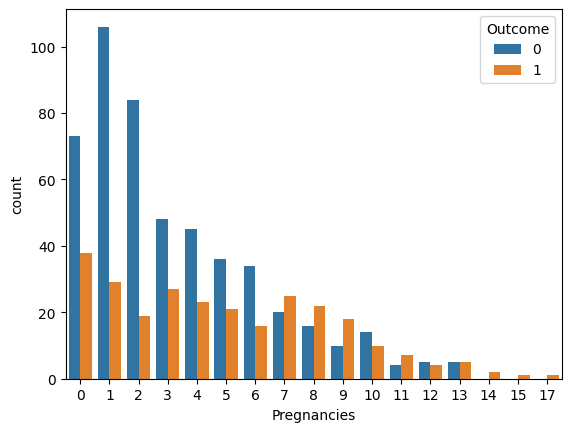

In [65]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

# -> 임신 횟수 7번 이상부터 발병 빈도가 발병하지 않은 빈도보다 더 높아짐
# 조건이 많아지면 case가 적은 경우 overfitting이 발생할 수 있다.
# 그래서 이런 경우엔 범주형 변수로 바꾸어 사용한다.

In [61]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듦

df["Pregnancies_high"] = df["Pregnancies"] > 6 # 임신 횟수가 7명 이상인 경우
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<ipython-input-67-a5d26640c353>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Pregnancies_high", palette=palette)


<Axes: xlabel='Pregnancies_high', ylabel='count'>

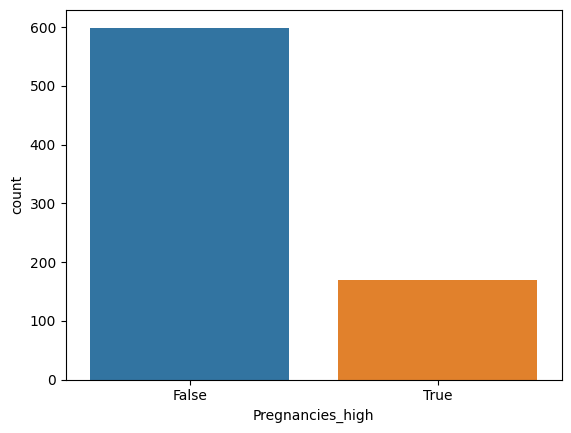

In [67]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x="Pregnancies_high", palette=palette)
# -> 발병 빈도에서 임신 횟수 7번 이상의 case보다 미만인 case가 훨씬 더 많다.
# => 임신 횟수가 많아질수록 당뇨병 발병률이 높아보였던 것은, 임신 횟수가 높은 데이터가 적어서였음